### Data Processing

In [114]:
import pandas as pd
import numpy as np
from numpy import array

Raw_Cities_Distance = pd.read_excel('Korea-Distance.xlsx', index_col=0)
Raw_Cities_Distance = Raw_Cities_Distance.fillna(0)
# Sometimes, there's a bug to exclude index column of xlsx files during reading,
# even adding the 'index_col = None' statement.

Raw_Cities_Distance

,Incheon,Seoul,Busan,Daegu,Daejeon,Gwangju,Suwon-si,Ulsan,Jeonju,Cheongju-si,Changwon,Jeju-si,Chuncheon,Hongsung,Muan
Incheon,0.0,27.0,335.0,244.0,141.0,257.0,33.0,316.0,186.0,115.0,304.0,439.0,102.0,95.0,275.0
Seoul,27.0,0.0,330.0,237.0,144.0,268.0,31.0,307.0,195.0,113.0,301.0,453.0,75.0,111.0,290.0
Busan,335.0,330.0,0.0,95.0,199.0,193.0,304.0,54.0,189.0,221.0,35.0,291.0,330.0,271.0,233.0
Daegu,244.0,237.0,95.0,0.0,117.0,171.0,212.0,75.0,130.0,130.0,72.0,324.0,236.0,191.0,215.0
Daejeon,141.0,144.0,199.0,117.0,0.0,137.0,114.0,192.0,61.0,36.0,167.0,323.0,175.0,74.0,171.0
Gwangju,257.0,268.0,193.0,171.0,137.0,0.0,238.0,222.0,77.0,173.0,161.0,186.0,311.0,162.0,44.0
Suwon-si,33.0,31.0,304.0,212.0,114.0,238.0,0.0,284.0,164.0,84.0,274.0,423.0,91.0,83.0,260.0
Ulsan,316.0,307.0,54.0,75.0,192.0,222.0,284.0,0.0,198.0,205.0,67.0,341.0,296.0,266.0,265.0
Jeonju,186.0,195.0,189.0,130.0,61.0,77.0,164.0,198.0,0.0,96.0,154.0,264.0,234.0,97.0,111.0
Cheongju-si,115.0,113.0,221.0,130.0,36.0,173.0,84.0,205.0,96.0,0.0,190.0,359.0,139.0,74.0,205.0


In [115]:
# transform to numpy
Cities_Distance = Raw_Cities_Distance.to_numpy()

### Generate all possible cities permutation

In [116]:

initial_schedule = list(range(len(Cities_Distance)))
#print(current_schedule)

def get_permutation(current_schedule):
    permutation = []
    for i in range(len(current_schedule)):
        for j in range(i+1, len(current_schedule)):
            neighbor = current_schedule.copy()
            neighbor[i] = current_schedule[j]
            neighbor[j] = current_schedule[i]
            loc = [i, j]
            loc.extend(neighbor)
            loc.extend([0,0])
            permutation.append(loc)
    permutation = np.array(permutation)

    return permutation

In [117]:
def get_schedule_length(arbitrary_array):
    sum = 0
    for j in range(len(arbitrary_array)-1):
        sum += Cities_Distance[arbitrary_array[j],arbitrary_array[j+1]]
    return sum

def get_new_schedule(permutation, best_result, boolean_table):
    store_i = 0
    store_j = 0
    current_schedule = []
    for i in range(len(permutation)):
        sum = 0
        sum = get_schedule_length(permutation[i,2:18])

        if boolean_table[permutation[i,0], permutation[i,1]]!=1:
            permutation[i,18] = int(sum)
            if (sum < best_result):
                best_result = sum
                store_i = permutation[i,0]
                store_j = permutation[i,1]
                current_schedule = permutation[i,2:17]

    boolean_table[store_i, store_j] = 1
    boolean_table[store_j, store_i] = 1

    return current_schedule, best_result, boolean_table

### (c) Run Random Walk to find the optimal path


In [118]:
best_result = get_schedule_length(np.append(initial_schedule, [0]))
best_schedule = initial_schedule
RW = []
RW.append(best_result)
for i in range(100):
    current_schedule = np.random.permutation(best_schedule)
    current_schedule_plus_0 = np.append(current_schedule,[0])
    if(get_schedule_length(current_schedule_plus_0)<best_result):
        best_schedule = current_schedule
        best_result = get_schedule_length(current_schedule_plus_0)
    RW.append(best_result)

print(RW)

[3110.0, 2729.0, 2729.0, 2729.0, 2729.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2698.0, 2589.0, 2589.0, 2589.0, 2589.0, 2589.0, 2589.0, 2501.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2212.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0, 2126.0]


### (d) Run Hill Climbing to find the optimal path

In [119]:
# build a boolean table for HC
size = len(Cities_Distance)
HC_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    HC_boolean_table[0, i] = HC_boolean_table[i, 0] = 1

### Start Iterations
best_schedule = initial_schedule
best_result = 10e6
HC = []
HC.append(get_schedule_length(np.append(initial_schedule, [0])))
for i in range(100):
    for j in range(1000):
        current_schedule = np.random.permutation(best_schedule)
        current_schedule_plus_0 = np.append(current_schedule,[0])
        if(get_schedule_length(current_schedule_plus_0)<best_result):
            best_schedule = current_schedule
            best_result = get_schedule_length(current_schedule_plus_0)
    HC.append(best_result)
print(HC)

[3110.0, 1949.0, 1936.0, 1908.0, 1837.0, 1837.0, 1800.0, 1800.0, 1643.0, 1629.0, 1629.0, 1629.0, 1629.0, 1629.0, 1629.0, 1629.0, 1629.0, 1629.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0, 1536.0]


### (e) Run Tabular Search to find the optimal path

In [120]:
# build a boolean table for TS
size = len(Cities_Distance)
TS_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    TS_boolean_table[0, i] = TS_boolean_table[i, 0] = 1

In [121]:
best_result = 10e6
TS = []
TS.append(get_schedule_length(np.append(initial_schedule, [0])))
best_schedule = initial_schedule
for i in range(100):
    # print(f'Step:{i}')
    permutation = get_permutation(best_schedule)
    current_schedule, best_result, TS_boolean_table = get_new_schedule(permutation,
                                                                       best_result,
                                                                       TS_boolean_table)
    if current_schedule != []:
        best_schedule = current_schedule
    else:
        pass
    best_schedule_plus_0 = np.append(best_schedule, [0])
    TS.append(get_schedule_length(best_schedule_plus_0))

best_schedule = np.append(best_schedule, [0])
best_result = get_schedule_length(best_schedule)
# print(f'The best_result is: {best_result}')
print(TS)
# print(f'Travel distances in each iterations {np.array(TS).shape}')

[3110.0, 2558.0, 2114.0, 1859.0, 1597.0, 1551.0, 1477.0, 1432.0, 1425.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0, 1370.0]


C:\Users\woody\Desktop\(Wed_234)_Computation_of_Data_Science\Homework\venv\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


---
### 3.(a) SA on travel route problem

In [122]:
# Define iteration numbers
n = 2
# Set temperature reduction factor
c = 0.5
NO_UPDATE_TIMES = 10e4

SA = []
SA.append(get_schedule_length(np.append(initial_schedule, [0])))

# Main
best_schedule = initial_schedule
import numpy as np
rand_4pts = []
for j in range(4):
    rand_schedule = np.random.permutation(initial_schedule)
    rand_4pts.append(get_schedule_length(np.append(rand_schedule, [0])))

init_temp = np.mean(rand_4pts)
print(f'The init_temp is: {init_temp}')

temp = init_temp
no_update_times = 0
update_times = 0
while((update_times<100)&(no_update_times<=NO_UPDATE_TIMES)):
    iter = 0
    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        # print(f'no_update_times = {no_update_times}')
        current_schedule = best_schedule

        # randomly select an new_schedule
        new_schedule = np.random.permutation(current_schedule)

        current_schedule_distance = get_schedule_length(np.append(current_schedule, [0]))
        new_schedule_distance = get_schedule_length(np.append(new_schedule, [0]))
        del_f = new_schedule_distance - current_schedule_distance
        # print(f'del_f = {del_f}')

        if (del_f)<0:
            r = np.random.uniform(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))
            #print(f' r = {r} , $P(X_2)$ = {Prob_of_X_2}')
            if Prob_of_X_2>r:
                best_schedule = new_schedule
                SA.append(float(get_schedule_length(np.append(best_schedule, [0]))))
                # print(SA)
                temp = c*temp
                update_times +=1
                no_update_times = 0
        else:
            no_update_times +=1

        iter += 1

for i in range(update_times+1, 101):
    SA.append(float(get_schedule_length(np.append(best_schedule, [0]))))
print(SA)

The init_temp is: 3091.0
[3110.0, 3030.0, 2999.0, 2762.0, 2111.0, 1973.0, 1954.0, 1949.0, 1939.0, 1924.0, 1922.0, 1857.0, 1655.0, 1623.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0, 1389.0]


---
### FE plot

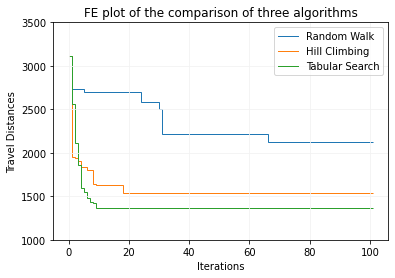

In [123]:
import matplotlib.pyplot as plt
plot1 = plt.stairs(RW, label='Random Walk', baseline=None)
plot1 = plt.stairs(HC, label='Hill Climbing', baseline=None)
plot1 = plt.stairs(TS, label='Tabular Search', baseline=None)

plot1 = plt.xlabel('Iterations')
plot1 = plt.ylabel('Travel Distances')
plot1 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plot1 = plt.ylim(1000, 3500)
plot1 = plt.grid(axis='both', color='0.95')

plot1 = plt.legend(loc=1)

plot1 = plt.show()

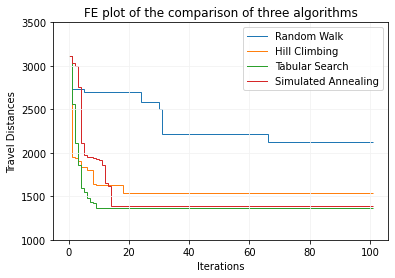

In [124]:
plot2 = plt.stairs(RW, label='Random Walk', baseline=None)
plot2 = plt.stairs(HC, label='Hill Climbing', baseline=None)
plot2 = plt.stairs(TS, label='Tabular Search', baseline=None)
plot2 = plt.stairs(SA, label='Simulated Annealing', baseline=None)

plot2 = plt.xlabel('Iterations')
plot2 = plt.ylabel('Travel Distances')
plot2 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plot2 = plt.ylim(1000, 3500)
plot2 = plt.grid(axis='both', color='0.95')

plot2 = plt.legend(loc=1)

plot2 = plt.show()

In [125]:
import json

with open('result\Second_Part\RW.json', 'w') as f:
    json.dump(RW, f)

with open('result\Second_Part\HC.json', 'w') as f:
    json.dump(HC, f)

with open('result\Second_Part\TS.json', 'w') as f:
    json.dump(TS, f)
